# Logistic Regression: Application

In this notebook, we examine how to apply logistic regression in R on a sample dataset containing information on whether an indiviudal purchased a product based on multiple variables.

Sources:
1. <a href='https://www.udemy.com/course/machinelearning/'>Machine Learning A-Z™: Hands-On Python & R In Data Science</a>
2. <a href='https://kiwidamien.github.io/are-you-sure-thats-a-probability.html'>Are you sure that's a probability?</a>
3. <a href='https://www.datasciencecentral.com/understanding-type-i-and-type-ii-errors/'>Understanding Type I and Type II Errors</a>

In [1]:
libraries <- c('caret', 'caTools', 'ElemStatLearn')

lapply(X=libraries, FUN=library, character.only=TRUE)

Loading required package: ggplot2

Loading required package: lattice



[[1]]
 [1] "caret"     "lattice"   "ggplot2"   "stats"     "graphics"  "grDevices"
 [7] "utils"     "datasets"  "methods"   "base"     

[[2]]
 [1] "caTools"   "caret"     "lattice"   "ggplot2"   "stats"     "graphics" 
 [7] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[3]]
 [1] "ElemStatLearn" "caTools"       "caret"         "lattice"      
 [5] "ggplot2"       "stats"         "graphics"      "grDevices"    
 [9] "utils"         "datasets"      "methods"       "base"

## Load & Preview Data

In [2]:
# Define purchase data file path
purchases_file_path <- file.path('../Data/Social_Network_Ads.csv')

# Load purchase data
purchases <- read.csv(purchases_file_path)

In [3]:
cat('Shape:')
dim(purchases)

cat('\n\nPreview:')
head(purchases, 20)

cat('\n\nStructure:\n')
str(purchases)

cat('\n\nSummary:')
summary(purchases)

Shape:

[1] 400   3



Preview:

,Age,EstimatedSalary,Purchased
,<int>,<int>,<int>
1,19,19000,0
2,35,20000,0
3,26,43000,0
4,27,57000,0
5,19,76000,0
6,27,58000,0
7,27,84000,0
8,32,150000,1
9,25,33000,0




Structure:
'data.frame':	400 obs. of  3 variables:
 $ Age            : int  19 35 26 27 19 27 27 32 25 35 ...
 $ EstimatedSalary: int  19000 20000 43000 57000 76000 58000 84000 150000 33000 65000 ...
 $ Purchased      : int  0 0 0 0 0 0 0 1 0 0 ...


Summary:

      Age        EstimatedSalary    Purchased     
 Min.   :18.00   Min.   : 15000   Min.   :0.0000  
 1st Qu.:29.75   1st Qu.: 43000   1st Qu.:0.0000  
 Median :37.00   Median : 70000   Median :0.0000  
 Mean   :37.66   Mean   : 69743   Mean   :0.3575  
 3rd Qu.:46.00   3rd Qu.: 88000   3rd Qu.:1.0000  
 Max.   :60.00   Max.   :150000   Max.   :1.0000  

## Prepare Data

In [4]:
# Set seed for constant splitting results
set.seed(123)

# Define train-test split function
split <- sample.split(Y=purchases$Purchased, SplitRatio = 0.75)
purchases_train <- subset(purchases, split==TRUE)
purchases_test <- subset(purchases, split==FALSE)

In [5]:
# Define mean & standard deviation for scaling
purchases_scale  <- scale(purchases_train[,-3])
scale_mean <- attr(purchases_scale, which='scaled:center')
scale_standard_deviation <- attr(purchases_scale, which='scaled:scale')

# Scale training data
purchases_train[,-3] <- scale(purchases_train[,-3]
                            ,center=scale_mean
                            ,scale=scale_standard_deviation)
# Scale test data
purchases_test[,-3] <- scale(purchases_test[,-3]
                            ,center=scale_mean
                            ,scale=scale_standard_deviation)

## Prepare Classifier

In [6]:
# Initialize classifier object
classifier <- glm(formula = Purchased ~ .
                  ,family=binomial
                  ,data=purchases_train)

## Use Classifier

At this stage we have "built" our machine learning classifier.  Now we will examine how we can use this on an example of an individual who did purchase the product.  Examining our original data, we see a case of someone who did not purchase the product being 27 year old with a salary of 84000, while a case of someone who did purchase the product is a 32 year old with a salary of 150,000.

In [7]:
# Create example data points
ages <- c(27, 32)
salaries <- c(84000, 150000)
# Create example dataframe
examples <- data.frame(ages, salaries)
# Rename columns
names(examples) <- c('Age', 'EstimatedSalary')
# Scale data
examples <- scale(examples
                  ,center=scale_mean
                  ,scale=scale_standard_deviation) |> data.frame()

# Compute class probabilities
probabilities <- predict(classifier
                         ,type='response'
                         ,newdata=examples)

print(probabilities)
cat('\nFigure 1') 

        1         2 
0.0357766 0.6436936 

Figure 1

The predict() function returns the probability of each datapoint falling into class 1 (will purchase the product).  In Figure 1, our first example (a 27 year old with a salary of 84000) then has a 3.5% chance of falling into this class, and consequently, a 96.5% chance of falling into class 0 (will not purchase the product).

The second example (a 32 year old with a salary of 150,000 has a 64.37% chance of falling into class 1.  To get the actual class predictions, we can simply use an ifelse() function and determine a threshold.  A typical threshold is at 50%; that is, if a datapoint has less than a 50% chance, we predict class 0, and if the datapoint has equal to or greater than this probability, we predict class 1.

We now apply this classifier to the entire test set.

In [8]:
# Compute class probabilities
probabilities <- predict(classifier
        ,type='response'
        ,newdata=purchases_test[,-3])

# Get predictions
predictions <- ifelse(probabilities > 0.5, 1, 0)

With the test predictions, we can create a confusion matrix.  A confusion matrix looks as follows:

<table>
    <tr><td colspan=2></td><td colspan=2>Predicted</td></tr>
    <tr><td colspan=2></td><td>0</td><td>1</td></tr>
    <tr><td rowspan=3>Actual</td></tr>
    <tr><td>0</td><td>$a$</td><td>$b$</td></tr>
    <tr><td>1</td><td>$c$</td><td>$d$</td></tr>
</table>

Therefore, the values may be interpreted as follows:
<ul>
    <li>$a$ represents datapoints we classified as 0 (will not purchase the product), and actually did not purchase.</li>
    <li>$b$ represents datapoints we classified as 1 (will purchase the product), but did not actually purchase (false positive).</li>
    <li>$c$ represents datapoints we classified as 0, but actually did purchase (false negative).</li>
    <li>$d$ represents datapoints we classified as 1, and did actually purchase.</li>
</ul>
    

Illustrated differently, a confusion matrix may be interpreted as follows:

<table>
    <tr><td>correcty predicted first class</td><td>incorrectly predicted second class</td></tr>
    <tr><td>incorrectly predicted first class</td><td>correctly predicted second class</td></tr>
</table>

In [9]:
# Create confusion matrix
confusion_matrix <- table(Actuals=purchases_test[,3], Predictions=predictions)

# View confusion matrix
confusion_matrix

# Computer classifier accuracy
cat('Accuracy:', (diag(confusion_matrix) |> sum() * 100) / sum(confusion_matrix))

cat('\n\nFigure 2')

       Predictions
Actuals  0  1
      0 57  7
      1 10 26

Accuracy: 83

Figure 2

Examining the confusion matrix in Figure 2, we see that we correctly predicted that 57 individudals would not purchase the product, and correctly predicted that 26 individuals would make the purchase.  We incorrectly predicted that 7 individuals would make the purchase, when they actually did not, and we incorrectly predicted that 10 individuals would not purchase the product, when they actually did.

It is worth noting that in this particular case, we more often "missed someone who would purchased the product" than "tried selling to someone who would not make the purchase."  These are known as "type" errors.  A type 1 error is a false positive; that is, we predicted something to be true (would make the purchase), when it was actually false (did not make the purchase).  A type 2 error is a false negative; that is, we predicted something to be false, when it was actually true$^3$.

Using the confusionMatrix() function of the caret library, we can return a confusion matrix along with many other statistical measures.

In [10]:
# Get confusion matrix and statistics
confusionMatrix(factor(predictions)
                ,factor(purchases_test[,3])
               )

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 57 10
         1  7 26
                                          
               Accuracy : 0.83            
                 95% CI : (0.7418, 0.8977)
    No Information Rate : 0.64            
    P-Value [Acc > NIR] : 2.389e-05       
                                          
                  Kappa : 0.6242          
                                          
 Mcnemar's Test P-Value : 0.6276          
                                          
            Sensitivity : 0.8906          
            Specificity : 0.7222          
         Pos Pred Value : 0.8507          
         Neg Pred Value : 0.7879          
             Prevalence : 0.6400          
         Detection Rate : 0.5700          
   Detection Prevalence : 0.6700          
      Balanced Accuracy : 0.8064          
                                          
       'Positive' Class : 0               
                                    

## Visualize Classifier

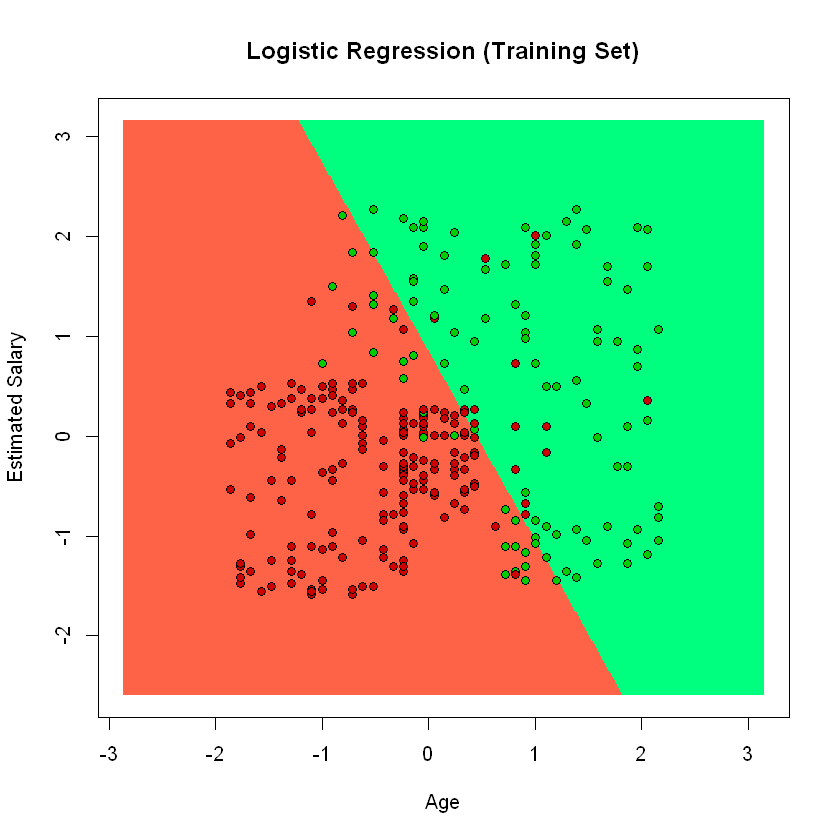

In [11]:
# Define set to plot as training set
set = purchases_train
# Define ranges for x-axis (age) and y-axis (salary)
age_range = seq(min(set[,1]) - 1, max(set[,1]) + 1, by=0.01)
salary_range = seq(min(set[,2]) - 1, max(set[,1]) + 1 , by=0.01)
# Create matrix of all combinations of points from age_range and salary_range
grid_matrix = expand.grid(age_range, salary_range)
# Specify column names that classifier will expect
colnames(grid_matrix) = c('Age', 'EstimatedSalary')
# Get classification probabilities
probabilities = predict(classifier, type='response', newdata=grid_matrix)
# Get predictions based on class probability
predictions = ifelse(probabilities > 0.5, 1, 0)

# Plot data
plot(set[,-3] # Plot all fields but label
     ,main = 'Logistic Regression (Training Set)' # Title plot
     ,xlab='Age' # Label x-axis
     ,ylab='Estimated Salary' # Lbael y-axis
     ,xlim=range(age_range) # Define x-axis range
     ,ylim=range(salary_range)) # Define y-axis range

# Add contour ine separating classes
contour(age_range, salary_range, matrix(as.numeric(predictions), length(age_range), length(salary_range)), add=TRUE)
# Plot "fake points" at every pixel, essentially coloring each class region
points(grid_matrix, pch='.', col=ifelse(predictions ==1, 'springgreen1', 'tomato'))
# Plot actual points
points(set, pch=21, bg=ifelse(set[,3] == 1, 'green3', 'red3'))

...

The red region is where the classifier predicts that the individual will not purchase the product, and the green region is where our classifier predicts that the individual will purchase the product.

... For example, we see that an older age tends to result in purchases more often than high salaries.  Most young folks in our dataset did not purchase the product, even if they have a high salary, whereas most older folks did purchase the product, including those with a low salary.

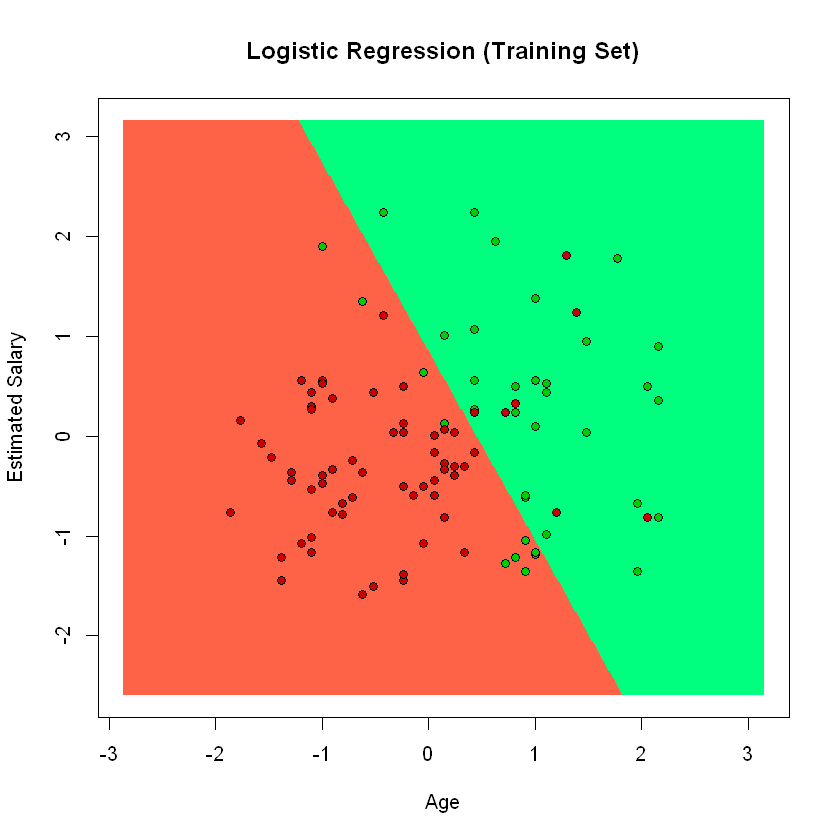

In [12]:
# Define set to plot as training set
set = purchases_test
# Define ranges for x-axis (age) and y-axis (salary)
age_range = seq(min(set[,1]) - 1, max(set[,1]) + 1, by=0.01)
salary_range = seq(min(set[,2]) - 1, max(set[,1]) + 1 , by=0.01)
# Create matrix of all combinations of points from age_range and salary_range
grid_matrix = expand.grid(age_range, salary_range)
# Specify column names that classifier will expect
colnames(grid_matrix) = c('Age', 'EstimatedSalary')
# Get classification probabilities
probabilities = predict(classifier, type='response', newdata=grid_matrix)
# Get predictions based on class probability
predictions = ifelse(probabilities > 0.5, 1, 0)

# Plot data
plot(set[,-3] # Plot all fields but label
     ,main = 'Logistic Regression (Training Set)' # Title plot
     ,xlab='Age' # Label x-axis
     ,ylab='Estimated Salary' # Lbael y-axis
     ,xlim=range(age_range) # Define x-axis range
     ,ylim=range(salary_range)) # Define y-axis range

# Add contour ine separating classes
contour(age_range, salary_range, matrix(as.numeric(predictions), length(age_range), length(salary_range)), add=TRUE)
# Plot "fake points" at every pixel, essentially coloring each class region
points(grid_matrix, pch='.', col=ifelse(predictions ==1, 'springgreen1', 'tomato'))
# Plot actual points
points(set, pch=21, bg=ifelse(set[,3] == 1, 'green3', 'red3'))